Team Members:
Jetendra Mulinti, Goutham Vemula, Prajeeth Nakka

# Introduction: 

We are building a Navie Bais model to predict whether the review is Postive or Negative

Steps we are following

1. Loading data
2. Data Preparation
3. Frequency Distribution Plots
4. Naïve Bayes Model Training
5. Model Testing
6. Conclusion

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.options.display.max_columns = 999
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import os


import io
import requests
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize


from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()


from joblib import load, dump

In [2]:
# # Download the list of stopwords from NLTK
# nltk.download('punkt')
# nltk.download('stopwords')

# Loading data

In [3]:
# Function to fetch file paths from a GitHub repo
def get_file_paths(github_url):
    # Extract owner, repo, and path from the GitHub URL
    owner_repo, path = github_url.split('/tree/main/')
    owner, repo = owner_repo.replace('https://github.com/', '').split('/')
    
    # GitHub API URL for contents
    api_url = f'https://api.github.com/repos/{owner}/{repo}/contents/{path}'
    response = requests.get(api_url)
    response.raise_for_status()  # will throw an error if the request fails
    
    file_paths = []
    for file_info in response.json():
        file_paths.append(file_info['download_url'])
    return file_paths

In [4]:
# Function to read and preprocess files from GitHub
def read_and_preprocess(file_paths):
    reviews = []
    for file_url in file_paths:
        response = requests.get(file_url)
        response.raise_for_status()
        content = response.content.decode('utf-8').lower()
        content = re.sub(r'\b\w{1,2}\b', '', content) # Remove short words
        content = re.sub(r'[^\w\s]', '', content) # Remove punctuation
        word_tokens = word_tokenize(content) # Tokenize
        filtered_sentence = [w for w in word_tokens if not w in stopwords.words('english')] # Remove stopwords
        reviews.append(" ".join(filtered_sentence))
    return reviews


In [5]:
# GitHub URLs for positive and negative review directories
pos_reviews_url = r'https://github.com/JetendraMulinti/DAV-6150---DataScience/tree/main/M10%20Practical%20Challenge%20Na%C3%AFve%20Bayes%20Sentiment%20Analysis/txt_sentoken/pos'
neg_reviews_url = r'https://github.com/JetendraMulinti/DAV-6150---DataScience/tree/main/M10%20Practical%20Challenge%20Na%C3%AFve%20Bayes%20Sentiment%20Analysis/txt_sentoken/neg'

# Get file paths from GitHub
pos_file_paths = get_file_paths(pos_reviews_url)
neg_file_paths = get_file_paths(neg_reviews_url)

In [6]:
print("Length of positive file paths: " ,len(pos_file_paths))

print("Length of Negative file paths: " ,len(neg_file_paths))

Length of positive file paths:  1000
Length of Negative file paths:  1000


In [7]:
# Read and preprocess the reviews into a list of all Texts

from datetime import datetime

now = datetime.now()
dt_string_S = now.strftime("%d/%m/%Y %H:%M:%S")

print("Started at = ", dt_string_S)

### pos_reviews
pos_reviews = read_and_preprocess(pos_file_paths)
print("one review +ve : ", pos_reviews[0])

### neg_reviews
neg_reviews = read_and_preprocess(neg_file_paths)
print("one review -ve : ", neg_reviews[0])

now = datetime.now()
dt_string_E = now.strftime("%d/%m/%Y %H:%M:%S")
print("Ended at = ", dt_string_E)

Started at =  26/03/2024 03:21:55
one review +ve :  films adapted comic books plenty success whether superheroes batman superman spawn geared toward kids casper arthouse crowd ghost world never really comic book like hell starters created alan moore eddie campbell brought medium whole new level mid 80s part series called watchmen say moore campbell thoroughly researched subject jack ripper would like saying michael jackson starting look little odd book graphic novel 500 pages long includes nearly consist nothing footnotes words dismiss film source get past whole comic book thing might find another stumbling block hell directors albert allen hughes getting hughes brothers direct seems almost ludicrous casting carrot top well anything riddle better direct film set ghetto features really violent street crime mad geniuses behind menace society ghetto question course whitechapel 1888 london east end filthy sooty place whores called unfortunates starting get little nervous mysterious psychop

# Data Preparation

In [8]:
### Function for the term_document_matrix 
def construct_term_document_matrix(pos_reviews, neg_reviews):
    """
    Constructs a term-document matrix from positive and negative reviews.
    Each entry is labeled according to its sentiment.
    """
    vectorizer = CountVectorizer()
    all_reviews = pos_reviews + neg_reviews
    labels = ['POS'] * len(pos_reviews) + ['NEG'] * len(neg_reviews)
    term_document_matrix = vectorizer.fit_transform(all_reviews)
    return term_document_matrix, labels, vectorizer.get_feature_names_out(), vectorizer

In [9]:
term_document_matrix, labels, features, vectorizer = construct_term_document_matrix(pos_reviews, neg_reviews)

print("Term-document matrix shape:", term_document_matrix.shape)
print("First 10 feature names:", features[:10])

Term-document matrix shape: (2000, 44320)
First 10 feature names: ['000' '0009f' '000acre' '000foot' '000paltry' '000week' '007' '007esque'
 '00s' '05425']


# Frequency Distribution Plots

In [11]:
# Tokenize the reviews
pos_words = [word for review in pos_reviews for word in word_tokenize(review)]
neg_words = [word for review in neg_reviews for word in word_tokenize(review)]

# Create frequency distributions
pos_freq_dist = FreqDist(pos_words)
neg_freq_dist = FreqDist(neg_words)

# Get the 30 most common words in positive and negative reviews
pos_most_common = pos_freq_dist.most_common(30)
neg_most_common = neg_freq_dist.most_common(30)

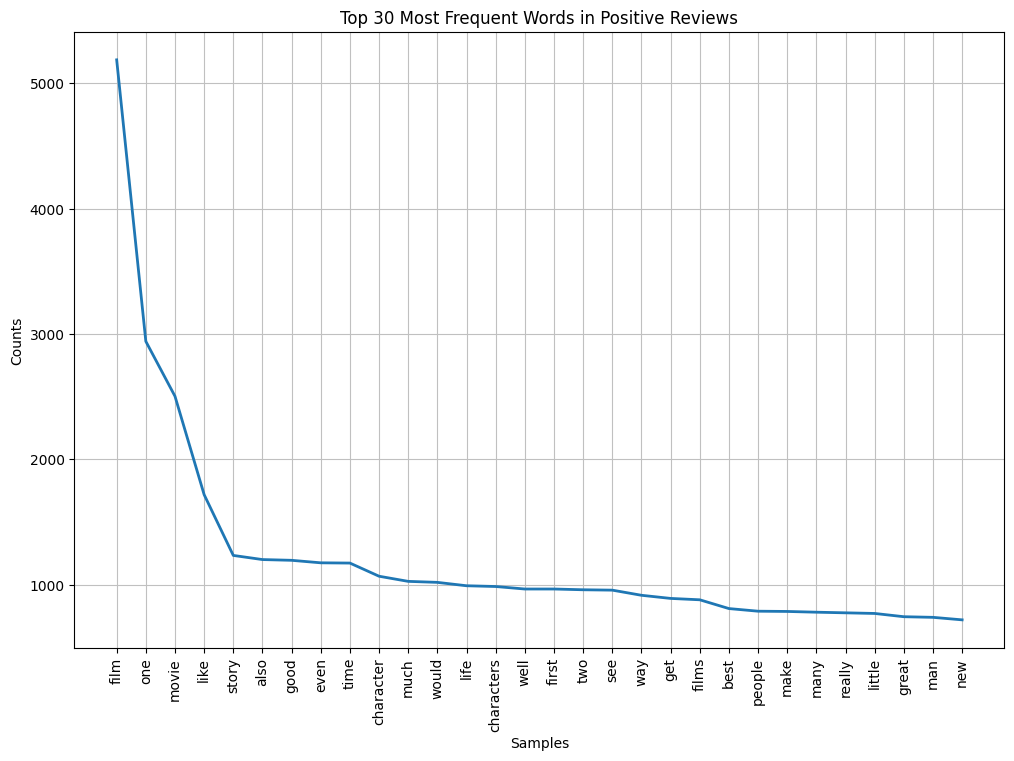

In [12]:
# Plot the results for positive reviews
plt.figure(figsize=(12, 8))
pos_freq_dist.plot(30, title='Top 30 Most Frequent Words in Positive Reviews')
plt.show()

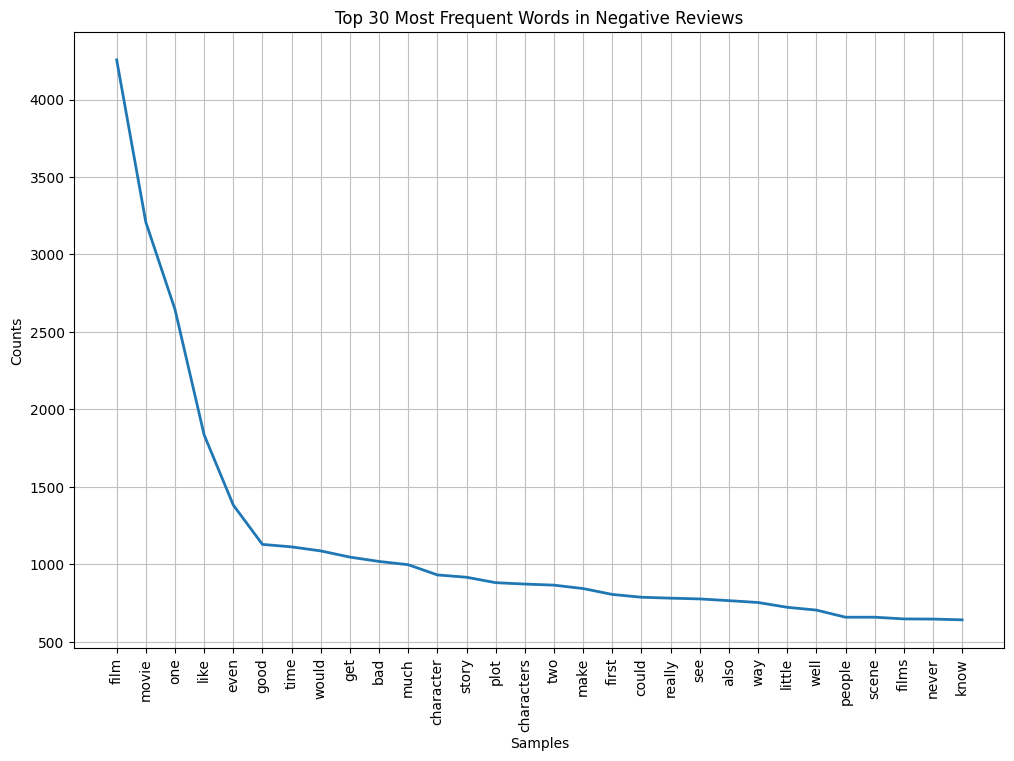

In [13]:
# Plot the results for negative reviews
plt.figure(figsize=(12, 8))
neg_freq_dist.plot(30, title='Top 30 Most Frequent Words in Negative Reviews')
plt.show()

1. Both positive and negative reviews frequently use similar neutral terms related to movies, indicating that most reviews, regardless of sentiment, focus on describing narrative elements.
2. Positive reviews tend to include specific positive words like "great" and "love", whereas negative reviews use fewer explicitly negative terms, suggesting a subtler expression of disapproval.
3. The high frequency of neutral terms in both review types highlights the importance of context in sentiment analysis, as the sentiment often depends on how these words are combined rather than their individual presence.

# Naïve Bayes Model Training

In [14]:
# Split the term-document matrix and labels 80:20
X_train, X_test, y_train, y_test = train_test_split(term_document_matrix, labels, test_size=0.20, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 1600 samples
Testing set size: 400 samples


We are using MultinomialNB, as we have the data format of text.

In [15]:
### Train a Naïve Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

# Model Testing

In [16]:
### Evaluate the Model
y_pred = nb_classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
sensitivity = metrics.recall_score(y_test, y_pred, pos_label='POS')
precision = metrics.precision_score(y_test, y_pred, pos_label='POS')
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Precision: {precision:.4f}")

Accuracy: 0.8125
Sensitivity (Recall): 0.8040
Precision: 0.8163


In [17]:
# Save the classifier and vectorizer
dump(nb_classifier, 'nb_classifier.pkl')

dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [18]:

# display the 30 most informative features for both classes

# The index for the positive and negative class
pos_class_index = np.where(nb_classifier.classes_ == 'POS')[0][0]
neg_class_index = np.where(nb_classifier.classes_ == 'NEG')[0][0]

# For the positive class
pos_class_features = sorted(zip(nb_classifier.feature_log_prob_[pos_class_index], features), reverse=True)
# For the negative class
neg_class_features = sorted(zip(nb_classifier.feature_log_prob_[neg_class_index], features), reverse=True)

# Extracting the top 30 features for both classes
top_30_pos_features = pos_class_features[:30]
top_30_neg_features = neg_class_features[:30]

print("Top 30 informative features for POS class:")
for log_prob, feature in top_30_pos_features:
    print(feature, round(np.exp(log_prob),3))  # converting from log prob to prob

print("\nTop 30 informative features for NEG class:")
for log_prob, feature in top_30_neg_features:
    print(feature, round(np.exp(log_prob),3))  # converting from log prob to prob

### Interpretation:
# Features with the highest positive log probabilities are those words that are most indicative of positive reviews
# Similarly, features with the highest negative log probabilities are most indicative of negative reviews
# High-probability features from both classes can tell us which words are most associated with positive or negative sentiments


Top 30 informative features for POS class:
film 0.012
one 0.007
movie 0.006
like 0.004
story 0.003
even 0.003
time 0.003
good 0.003
also 0.003
character 0.003
much 0.003
would 0.002
life 0.002
first 0.002
well 0.002
two 0.002
characters 0.002
see 0.002
way 0.002
get 0.002
films 0.002
people 0.002
make 0.002
many 0.002
really 0.002
best 0.002
man 0.002
great 0.002
little 0.002
never 0.002

Top 30 informative features for NEG class:
film 0.011
movie 0.008
one 0.007
like 0.005
even 0.004
good 0.003
would 0.003
get 0.003
time 0.003
bad 0.003
much 0.003
story 0.002
character 0.002
plot 0.002
characters 0.002
two 0.002
make 0.002
could 0.002
first 0.002
really 0.002
see 0.002
way 0.002
also 0.002
little 0.002
well 0.002
scene 0.002
people 0.002
never 0.002
films 0.002
scenes 0.002


1. Both positive and negative reviews frequently use many of the same neutral terms such as "film," "movie," and "story," which suggests that both sets of reviews are likely to discuss similar movie elements and plot details.

2. Positive reviews are characterized by certain words with positive connotations like "good," "best," and "great," whereas negative reviews include more critical terms such as "bad" and "plot" (potentially indicating issues with the plot).

3. The overlap of common words between both classes indicates that sentiment classification for this dataset may be challenging and could benefit from additional context-sensitive analysis or more sophisticated features beyond simple word frequencies.

In [19]:

## function for preprocess_review
def preprocess_review(review_text):
    """
    Preprocesses a single review by lowercasing, removing short words and punctuation,
    tokenizing, and filtering out stopwords.
    """
    review_text = review_text.lower()
    review_text = re.sub(r'\b\w{1,2}\b', '', review_text)
    review_text = re.sub(r'[^\w\s]', '', review_text)
    word_tokens = word_tokenize(review_text)
    filtered_sentence = [word for word in word_tokens if not word in stopwords.words('english')]
    return " ".join(filtered_sentence)

# Loading the classifier and vectorizer
nb_classifier_loaded = load('nb_classifier.pkl')
vectorizer_loaded = load('vectorizer.pkl')


unseen_review_text = """There were some things I didn't like about this film. Here's what I remember most 
strongly: a man in an ingeniously fake-looking polar bear costume (funnier than the 
"bear" from Hercules in New York); an extra with a less than believable laugh; an ex-drug 
addict martian with tics; child actors who recite their lines very slowly and carefully; 
a newspaper headline declaring that Santa has been "kidnapped", and a giant robot. The 
least appealing acting job in the film must be when Mother Claus and her elves have been 
"frozen" by the "Martians'" weapons. They seemed to display an exaggerated amount of 
fear. Perhaps this was the preferred acting style in the 1960's??"""



# Preprocessing the unseen review
preprocessed_unseen_review = preprocess_review(unseen_review_text)
print("Preprocessed review:", preprocessed_unseen_review)

# Transforming the unseen review using the loaded vectorizer
transformed_unseen_review = vectorizer_loaded.transform([preprocessed_unseen_review])

# Predicting the sentiment of the unseen review using the loaded classifier
predicted_class_unseen = nb_classifier_loaded.predict(transformed_unseen_review)
predicted_prob_unseen = nb_classifier_loaded.predict_proba(transformed_unseen_review)


print(f"Predicted class: {predicted_class_unseen[0]}")

print(f"Predicted probabilities: {predicted_prob_unseen}")


Preprocessed review: things like film remember strongly man ingeniously fakelooking polar bear costume funnier bear hercules new york extra less believable laugh drug addict martian tics child actors recite lines slowly carefully newspaper headline declaring santa kidnapped giant robot least appealing acting job film must mother claus elves frozen martians weapons seemed display exaggerated amount fear perhaps preferred acting style 1960
Predicted class: POS
Predicted probabilities: [[0.09778568 0.90221432]]


# Conclusion

Based on the above model we concluded the Unseen review as positive, we used the above 2000 reviews for building the model and used pickle concept for dumping the loading the model for reusing it on unseen data. 